____________________________________________________________________________
Phys474  - Spring 2022

Homework 4 - solving the Time Independent Schrodinger Equation for a finite square well

<font color='red'>Author: Owen Hallock




The TISE gives us the eignevalue equation 

$\hat{H}\Psi(x)=E\Psi(x)$ 

for the finite square well.

$\begin{eqnarray} 
V(x) &=&-V_0& & -L/2<x<L/2 \\
V(x) &=&0& & otherwise
\end{eqnarray}$


Use SI units for the problem
__________________________________________________________________________



Use the following parameters
- particle mass is $M_e=9.10938\times 10^{-31}$ kg
- the width of the well is 1 bohr radius $L=5.29177\times 10^{-11}$ meter
- the depth of the well is given by $V_0= 6.4\times10^{-16} \, J$
- make your x-array 3000 steps for $-\frac{3}{2}L \le x \le \frac{3}{2}L$

Part 1:

1) Solve the problem to get the energy eigenvalues and eigenfunctions <br>
2) print out the total number of bound states and the energy for each of those states (in Joules, eV and a.u.)

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt


#a.u
hbar = 1
m = 1

steps=3000

v0=6.4E-16/(4.36E-18)

Width = 1 #SI units

W= Width / 2.0
# create x-vector from -W to W
xvec=np.linspace(-3*W,3*W,steps,dtype=np.float_)
# get step size
h=xvec[1]-xvec[0]
potential=[]
for i in xvec:
    if abs(i) <= W:
        potential.append(-v0)
    if abs(i) > W:
        potential.append(0)

D=0
potential=np.minimum(potential,D)
V=potential*np.diag(np.ones(steps))
        
#Here is the new part...writing the 2nd order PD in x as finite difference equation
#and puting into matrix form of nxn for n points of the x-position
Laplacian = (np.diag(-2.0*np.ones(steps))+np.diag(np.ones(steps-1),1)+ \
    np.diag(np.ones(steps-1),-1))/h**2

#Hamiltonian = T+U
Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian+V

# now do eigenvalue problem H\psi=E\psi
# diagonalize the Hamiltonian yielding the wavefunctions and energies
E,V=la.eigh(Hamiltonian)

print('Bound state Energies')
print('Total number:6')
print('E in Joule: ',E[0:6]*4.35974E-18)
print('E in au: ',E[0:6])
print('E in eV: ',E[0:6]*4.35974E-18/1.6E-19)

Bound state Energies
Total number:6
E in Joule:  [-6.22736724e-16 -5.71266458e-16 -4.86241632e-16 -3.69147865e-16
 -2.23294711e-16 -5.93003339e-17]
E in au:  [-142.83804177 -131.03223086 -111.52996105  -84.67199072  -51.21743754
  -13.60180512]
E in eV:  [-3892.10452654 -3570.41536351 -3039.01020251 -2307.17415515
 -1395.59194456  -370.62708669]


____________________________________________________________________________________________
Part 2:

Plot the potential, bound state energies, and eigenfunctions like we did in class for other potentials

___________________________________________________________________________________________

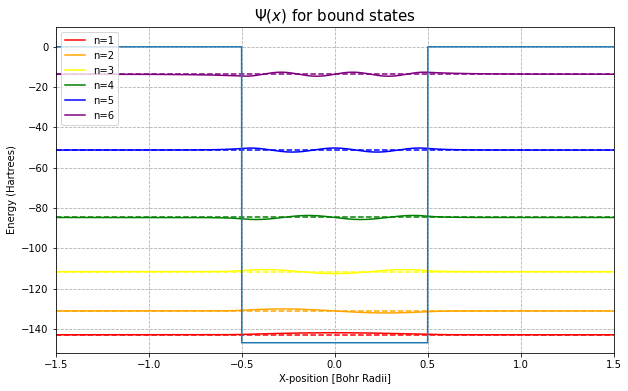

In [2]:
# Your code here...
plt.figure(figsize=(10,6))
plt.subplot(111)
colors = ('red','orange','yellow','green','blue','purple')
plt.xlim(-1.5*Width,1.5*Width)
plt.ylim(-v0-5,10)

for i in range(6):
    psi = V[:,i]
    psi =psi/psi.max()
    plt.plot(xvec,E[i]+psi,color=colors[i],label=r'n={:g}'.format(i+1))
    plt.plot([xvec.min(),xvec.max()],[E[i],E[i]],color=colors[i],linestyle='--')
plt.plot(xvec,potential)
plt.legend(loc='upper left')
plt.grid(linestyle='--')
plt.xlabel('X-position [Bohr Radii]')
plt.ylabel(r'Energy (Hartrees)')
plt.title(r'$\Psi(x)$ for bound states',fontsize=15)
plt.show()